# Weighted Estimation

This is an example to show how we introduce the weights on observations.
Underlying model is the non-spatial time-varying coefficient model, which is the same to the `non-spatial.ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.insert(1, "../")

import DynamicESF
from DynamicESF import HedonicModels

import time

print(f"{np.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{DynamicESF.__version__=}")

np.__version__='1.21.5'
matplotlib.__version__='3.5.1'
DynamicESF.__version__='0.1.1'


generate random walk sequences for coefficients beta

/tmp/ipykernel_600/2871716257.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


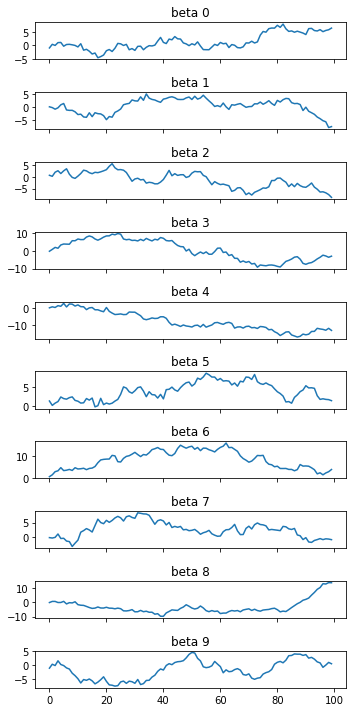

In [2]:
T = 100
D = 10
beta = np.cumsum(np.random.normal(size=(T,D)), axis=0)

fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d])
fig.tight_layout()
fig.show()

generate exogenous variables $X$, and endogenous variables $y$ from coefficents generated above

In [3]:
def gen_data(N):
    weights = np.random.choice([1, 10, 100], size=(T,N))
    X = np.random.normal(scale=2, size=(T,N,D))
    y = np.sum(beta[:,None] * X, axis=-1) + np.random.normal(scale=0.3, size=(T,N)) / weights

    return y, X, weights

fit model

In [4]:
N = 10
y, X, weights = gen_data(N)
maxiter = 1000

# model without weights
start = time.time()
model = HedonicModels.DynamicHedonic(y, X) # define model
model.fit(maxiter, loss_record=True) # fit with EM algorithm
elpstm = time.time() - start
print(elpstm, "sec. for fitting")

# model with weights
start = time.time()
model_w = HedonicModels.DynamicHedonic(y, X, weights=weights.reshape(y.shape)) # define wheighted model
model_w.fit(maxiter, loss_record=True) # fit with EM algorithm
elpstm = time.time() - start
print(elpstm, "sec. for fitting")

Q=-924.197:  19%|█▊        | 186/1000 [00:14<01:02, 13.00it/s] 


14.396336078643799 sec. for fitting


Q=-423.559:  20%|██        | 202/1000 [00:16<01:04, 12.46it/s]

16.223315954208374 sec. for fitting


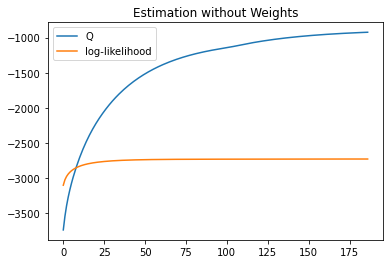

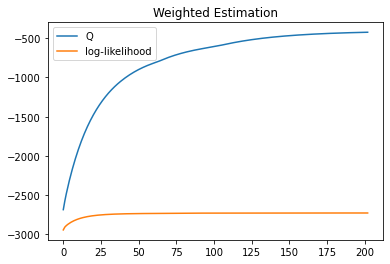

In [5]:
plt.title("Estimation without Weights")
plt.plot(model.DLM.Q, label="Q")
plt.plot(-np.array(model.DLM.loss), label="log-likelihood")
plt.legend()
plt.show()

plt.title("Weighted Estimation")
plt.plot(model_w.DLM.Q, label="Q")
plt.plot(-np.array(model_w.DLM.loss), label="log-likelihood")
plt.legend()
plt.show()

compare true beta and estimated beta. They almost perfectly match!

/tmp/ipykernel_600/2235451718.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


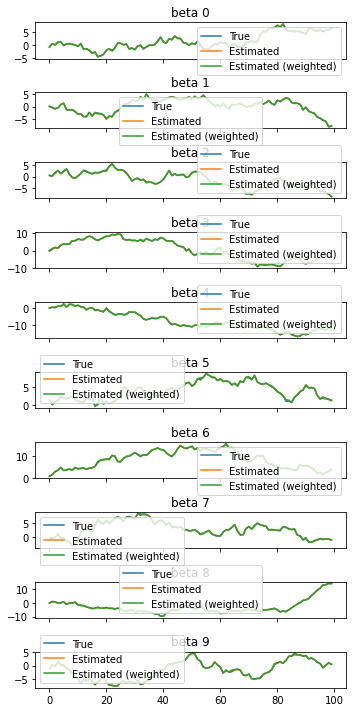

In [6]:
fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d], label="True")
    axes[d].plot(range(T), model.beta[:,d], label="Estimated")
    axes[d].plot(range(T), model_w.beta[:,d], label="Estimated (weighted)")
    axes[d].legend()
fig.tight_layout()
fig.show()

report computations times for various samplesize.

In [7]:
Ns = [1, 3, 5, 10, 20, 30, 40, 50, 100, 200]

elpstms = []
n_iter = []
for N in Ns:
    print(f"{N=}")
    y, X, weights = gen_data(N)

    start = time.time()
    model = HedonicModels.DynamicHedonic(y, X, weights=weights)
    model.fit(maxiter)

    elpstms.append(time.time() - start)
    n_iter.append(len(model.DLM.Q))

N=1


Q=-1459.462:   5%|▌         | 50/1000 [00:02<00:38, 24.94it/s]


N=3


Q=-1588.271:   6%|▋         | 64/1000 [00:02<00:38, 24.11it/s]


N=5


Q=-1445.156:  17%|█▋        | 167/1000 [00:07<00:36, 22.57it/s]


N=10


Q=-418.713:  17%|█▋        | 169/1000 [00:08<00:41, 19.96it/s]


N=20


Q=963.322:   2%|▏         | 17/1000 [00:01<01:05, 15.09it/s] 


N=30


Q=2359.606:   1%|          | 11/1000 [00:00<01:24, 11.66it/s]


N=40


Q=3600.546:   1%|          | 11/1000 [00:01<01:36, 10.23it/s]


N=50


Q=5294.535:   1%|          | 11/1000 [00:01<01:43,  9.52it/s]


N=100


Q=12331.531:   1%|          | 11/1000 [00:01<02:41,  6.11it/s]


N=200


Q=27434.928:   1%|          | 11/1000 [00:03<04:39,  3.53it/s]


/tmp/ipykernel_600/2098321904.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


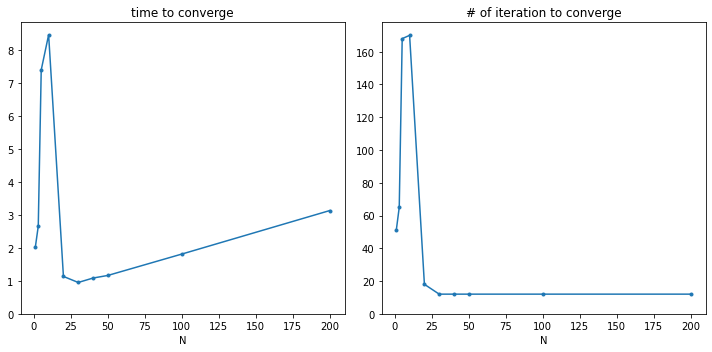

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title("time to converge")
axes[0].plot(Ns, elpstms, marker=".")
axes[0].set_xlabel("N")
axes[0].set_ylim(0, None)
axes[1].set_title("# of iteration to converge")
axes[1].plot(Ns, n_iter, marker=".")
axes[1].set_xlabel("N")
axes[1].set_ylim(0, None)
fig.tight_layout()
fig.show()